Han Saim Jeong
CSC 621 Machine Learning

Analyzing Protein Expression Data in a Mice Model of Down Syndrome

In [ ]:
# Update pandas and xlrd so that it can read the Protein Data excel sheet
!pip install pandas==1.1.2
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 17.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import needed libraries
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA()
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.express as px

In [ ]:
# Import data into dataframe
df = pd.read_excel("Data_Cortex_Nuclear.xls")
print(df)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H

Fill the nan values with the mean of the Group that data set belongs to

In [ ]:
# Group data by Class and fill in the null values with the means for each group
df_new = df.groupby("Group")
df_filled = df.groupby("Group", as_index=False).apply(lambda x: x.fillna(x.mean()))
df_new.mean()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
Group                                                                          
c-CS-m  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932  0.182211   
c-CS-s  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423  0.168356   
c-SC-m  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253  0.189547   
c-SC-s  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368  0.184975   
t-CS-m  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621  0.173956   
t-CS-s  0.525735  0.759556  0.305460  2.184606  3.514839  0.214466  0.164795   
t-SC-m  0.329861  0.566783  0.321063  2.379446  4.056223  0.269131  0.201007   
t-SC-s  0.337488  0.549056  0.325586  2.248742  3.565093  0.246759  0.185318   

        pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
Group                                  ...                                 
c-CS-m   2.916187  0.198484  1.492318  ...  0.226911  0.156882  0.132539   
c-CS-s   2.935576  0.208439  1.686844  ...  0.214818  0.144670  0.126590   
c-SC-m   4.736327  0.208149  1.278566  ...  0.224470  0.169294  0.155980   
c-SC-s   3.361288  0.214949  1.327714  ...  0.241853  0.156121  0.133082   
t-CS-m   3.121801  0.203395  1.563905  ...  0.216934  0.150572  0.132005   
t-CS-s   2.488902  0.210041  1.518302  ...  0.222144  0.150884  0.130186   
t-SC-m   4.277257  0.231789  1.381516  ...  0.230667  0.153697  0.137467   
t-SC-s   4.176555  0.227165  1.204840  ...  0.234828  0.174648  0.137082   

           pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
Group                                                                          
c-CS-m  0.119782  0.123929  0.467403   0.142027  0.174599  0.178675  1.523659  
c-CS-s  0.112512  0.126954  0.445322   0.145542  0.166534  0.172007  1.617609  
c-SC-m  0.128108  0.143614  0.456874   0.185664  0.217339  0.220825  1.009957  
c-SC-s  0.132929  0.135007  0.471512   0.152480  0.200690  0.219120  1.157639  
t-CS-m  0.108196  0.127762  0.413597   0.149539  0.162359  0.180920  1.633341  
t-CS-s  0.111354  0.121971  0.433587   0.158388  0.158174  0.191430  1.552633  
t-SC-m  0.137287  0.130234  0.445738   0.226197  0.196089  0.247652  1.041134  
t-SC-s  0.119201  0.133663  0.428207   0.208931  0.184275  0.226498  1.229815  

[8 rows x 77 columns]

In [ ]:
df.count()

MouseID      1080
DYRK1A_N     1077
ITSN1_N      1077
BDNF_N       1077
NR1_N        1077
             ... 
CaNA_N       1080
Genotype     1080
Treatment    1080
Behavior     1080
Group        1080
Length: 82, dtype: int64

In [ ]:
# Look at how many NaN values exist in the dataset
df_na = df.isna().sum()
pd.set_option('display.max_rows', None)
df_na = df_na.sort_values(ascending=False)
df_na

BCL2_N             285
H3MeK4_N           270
BAD_N              213
EGR1_N             210
H3AcK18_N          180
pCFOS_N             75
ELK_N               18
Bcatenin_N          18
MEK_N                7
pNUMB_N              3
TRKA_N               3
JNK_N                3
ERK_N                3
GSK3B_N              3
pP70S6_N             3
CREB_N               3
RSK_N                3
APP_N                3
TIAM1_N              3
RAPTOR_N             3
BRAF_N               3
NR2B_N               3
AMPKA_N              3
DSCR1_N              3
pMTOR_N              3
P38_N                3
MTOR_N               3
CAMKII_N             3
pNR2B_N              3
AKT_N                3
pRSK_N               3
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N     

In [ ]:
# Calculate the mean values to compare to the previous data means to see if the means have changed by replacing null values
df_filled.groupby("Group").mean()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
Group                                                                          
c-CS-m  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932  0.182211   
c-CS-s  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423  0.168356   
c-SC-m  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253  0.189547   
c-SC-s  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368  0.184975   
t-CS-m  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621  0.173956   
t-CS-s  0.525735  0.759556  0.305460  2.184606  3.514839  0.214466  0.164795   
t-SC-m  0.329861  0.566783  0.321063  2.379446  4.056223  0.269131  0.201007   
t-SC-s  0.337488  0.549056  0.325586  2.248742  3.565093  0.246759  0.185318   

        pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
Group                                  ...                                 
c-CS-m   2.916187  0.198484  1.492318  ...  0.226911  0.156882  0.132539   
c-CS-s   2.935576  0.208439  1.686844  ...  0.214818  0.144670  0.126590   
c-SC-m   4.736327  0.208149  1.278566  ...  0.224470  0.169294  0.155980   
c-SC-s   3.361288  0.214949  1.327714  ...  0.241853  0.156121  0.133082   
t-CS-m   3.121801  0.203395  1.563905  ...  0.216934  0.150572  0.132005   
t-CS-s   2.488902  0.210041  1.518302  ...  0.222144  0.150884  0.130186   
t-SC-m   4.277257  0.231789  1.381516  ...  0.230667  0.153697  0.137467   
t-SC-s   4.176555  0.227165  1.204840  ...  0.234828  0.174648  0.137082   

           pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
Group                                                                          
c-CS-m  0.119782  0.123929  0.467403   0.142027  0.174599  0.178675  1.523659  
c-CS-s  0.112512  0.126954  0.445322   0.145542  0.166534  0.172007  1.617609  
c-SC-m  0.128108  0.143614  0.456874   0.185664  0.217339  0.220825  1.009957  
c-SC-s  0.132929  0.135007  0.471512   0.152480  0.200690  0.219120  1.157639  
t-CS-m  0.108196  0.127762  0.413597   0.149539  0.162359  0.180920  1.633341  
t-CS-s  0.111354  0.121971  0.433587   0.158388  0.158174  0.191430  1.552633  
t-SC-m  0.137287  0.130234  0.445738   0.226197  0.196089  0.247652  1.041134  
t-SC-s  0.119201  0.133663  0.428207   0.208931  0.184275  0.226498  1.229815  

[8 rows x 77 columns]

In [ ]:
df_filled.count()

MouseID            1080
DYRK1A_N           1080
ITSN1_N            1080
BDNF_N             1080
NR1_N              1080
NR2A_N             1080
pAKT_N             1080
pBRAF_N            1080
pCAMKII_N          1080
pCREB_N            1080
pELK_N             1080
pERK_N             1080
pJNK_N             1080
PKCA_N             1080
pMEK_N             1080
pNR1_N             1080
pNR2A_N            1080
pNR2B_N            1080
pPKCAB_N           1080
pRSK_N             1080
AKT_N              1080
BRAF_N             1080
CAMKII_N           1080
CREB_N             1080
ELK_N              1080
ERK_N              1080
GSK3B_N            1080
JNK_N              1080
MEK_N              1080
TRKA_N             1080
RSK_N              1080
APP_N              1080
Bcatenin_N         1080
SOD1_N             1080
MTOR_N             1080
P38_N              1080
pMTOR_N            1080
DSCR1_N            1080
AMPKA_N            1080
NR2B_N             1080
pNUMB_N            1080
RAPTOR_N        

Normalize the data

In [ ]:
df_filled

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0 0         309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
  1         309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
  2         309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
  3         309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
  4         309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
  5         309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
  6         309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
  7         309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
  8         309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
  9        309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
  10       309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
  11       309_12  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333   
  12       309_13  0.364873  0.482102  0.312539  1.946201  3.349592  0.230898   
  13       309_14  0.381911  0.485914  0.310951  1.958907  3.349290  0.225800   
  14       309_15  0.374410  0.462313  0.344629  1.861162  3.287123  0.221811   
  15        311_1  0.743118  0.862653  0.377742  2.735757  6.067570  0.219049   
  16        311_2  0.711480  0.807054  0.351591  2.546888  5.595574  0.199170   
  17        311_3  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323   
  18        311_4  0.677359  0.770235  0.356397  2.563223  4.975196  0.228087   
  19        311_5  0.591572  0.678768  0.312480  2.164182  4.313938  0.195786   
  20        311_6  0.618517  0.716672  0.319701  2.285938  4.571180  0.206927   
  21        311_7  0.702608  0.699581  0.387750  2.437587  4.449231  0.258500   
  22        311_8  0.598869  0.690271  0.349774  2.308371  4.229412  0.221493   
  23        311_9  0.561867  0.641892  0.308488  2.157728  4.020693  0.216427   
  24       311_10  0.550970  0.561356  0.320853  2.197868  3.558896  0.237770   
  25       311_11  0.538413  0.701865  0.384445  2.482137  4.109706  0.288018   
  26       311_12  0.521127  0.583045  0.304279  2.053415  3.381345  0.251661   
  27       311_13  0.488372  0.540086  0.291310  1.913403  2.873623  0.215422   
  28       311_14  0.514855  0.564791  0.316056  1.957016  2.978824  0.250632   
  29       311_15  0.485100  0.556375  0.287250  1.892166  2.847005  0.223041   
  30        320_1  0.627582  0.954187  0.446958  2.930717  5.915039  0.197897   
  31        320_2  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810   
  32        320_3  0.644346  0.967179  0.470056  3.073847  5.927379  0.205131   
  33        320_4  0.568229  0.812018  0.393465  2.606780  5.808102  0.218211   
  34        320_5  0.587038  0.863728  0.411203  2.757975  6.006657  0.223688   
  35        320_6  0.595904  0.861763  0.421204  2.831169  6.368257  0.233017   
  36        320_7  0.522918  0.721090  0.363541  2.456261  5.191732  0.229179   
  37        320_8  0.530855  0.748072  0.385529  2.573126  5.495063  0.237427   
  38        320_9  0.534999  0.773863  0.391588  2.667701  5.987583  0.246624   
  39       320_10  0.519443  0.736371  0.370568  2.503050  4.947198  0.266489   
  40       320_11  0.508590  0.735699  0.384369  2.545403  5.101001  0.257127   
  41       320_12  0.516538  0.737479  0.383670  2.624646  5.601210  0.259119   
  42       320_13  0.454421  0.685278  0.360301  2.392890  4.500000  0.278715   
  43       320_14  0.471746  0.697323  0.371540  2.472661  4.652025  0.278197   
  44       320_15  0.481273  0.684116  0.360785  2.538809  5.008123  0.287229   
  45        321_1  0.560614  0.763028  0.402962  2.933516  6.317279  0.192320   
  46        321_2  0.516108  0.749622  0.401297  2.919243  6.306811  0.192541   
  47        321_3  0.507321  0.770026  0.417959  2.925818  6.766150  0.201012   
  48        321_4  0.505093  0.695549  0.

In [ ]:
# Scale data so that data range from [0, 1] using min-max scaling normalization
df_filled_new = df_filled.reset_index()
#df_filled_new
df_filled_new_nocat = df_filled_new.drop(labels=['level_0', 'level_1', 'MouseID', 'Genotype', 'Treatment', 'Behavior', 'Group'], axis=1)
#df_filled_new_nocat
df_norm = df_filled_new_nocat.transform(lambda x: ((x-x.min())/(x.max()-x.min())))

In [ ]:
df_norm

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1     0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2     0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3     0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4     0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   
5     0.127446  0.162396  0.660264  0.434772  0.455165  0.326476  0.443401   
6     0.119233  0.139285  0.595656  0.413462  0.405572  0.340336  0.474112   
7     0.114547  0.135187  0.556370  0.382932  0.375269  0.318608  0.456977   
8     0.101637  0.124324  0.530237  0.327547  0.344908  0.302609  0.409986   
9     0.099324  0.107723  0.647368  0.315408  0.275915  0.345540  0.490273   
10    0.093286  0.113655  0.556605  0.305645  0.285176  0.349378  0.512816   
11    0.092292  0.107773  0.628157  0.278571  0.256350  0.321758  0.554556   
12    0.092595  0.100430  0.516673  0.253571  0.238999  0.352369  0.493152   
13    0.099781  0.102047  0.512515  0.258807  0.238954  0.341654  0.491958   
14    0.096617  0.092035  0.600683  0.218530  0.229738  0.333272  0.479863   
15    0.252122  0.261865  0.687370  0.578919  0.641960  0.327466  0.479384   
16    0.238778  0.238279  0.618907  0.501093  0.571983  0.285687  0.402859   
17    0.235891  0.236363  0.615032  0.468476  0.564989  0.298618  0.399234   
18    0.224388  0.222660  0.631490  0.507824  0.480007  0.346460  0.483968   
19    0.188207  0.183858  0.516517  0.343393  0.381971  0.278575  0.383600   
20    0.199571  0.199938  0.535421  0.393565  0.420109  0.301989  0.425080   
21    0.235037  0.192687  0.713572  0.456054  0.402029  0.410379  0.525551   
22    0.191284  0.188738  0.614151  0.402809  0.369439  0.332603  0.486365   
23    0.175678  0.168215  0.506067  0.340734  0.338495  0.321956  0.433687   
24    0.171083  0.134050  0.538437  0.357275  0.270030  0.366811  0.515946   
25    0.165786  0.193656  0.704919  0.474411  0.351692  0.472415  0.629046   
26    0.158496  0.143251  0.495047  0.297751  0.243707  0.396005  0.495741   
27    0.144681  0.125027  0.461095  0.240057  0.168433  0.319844  0.578934   
28    0.155851  0.135508  0.525878  0.258028  0.184030  0.393843  0.438902   
29    0.143301  0.131937  0.450468  0.231306  0.164487  0.335857  0.448696   
30    0.203394  0.300695  0.868575  0.659255  0.619346  0.283012  0.480416   
31    0.213378  0.304018  0.915713  0.684791  0.628240  0.293338  0.491776   
32    0.210464  0.306206  0.929043  0.718233  0.621176  0.298214  0.468524   
33    0.178362  0.240385  0.728531  0.525772  0.603492  0.325704  0.457911   
34    0.186295  0.262321  0.774970  0.588074  0.632929  0.337215  0.495437   
35    0.190034  0.261487  0.801151  0.618235  0.686539  0.356822  0.488670   
36    0.159251  0.201812  0.650193  0.463749  0.512110  0.348756  0.484526   
37    0.162599  0.213258  0.707757  0.511904  0.557082  0.366090  0.488311   
38    0.164347  0.224199  0.723618  0.550876  0.630102  0.385420  0.476236   
39    0.157786  0.208294  0.668589  0.483029  0.475856  0.427168  0.558276   
40    0.153208  0.208009  0.704718  0.500481  0.498659  0.407492  0.541511   
41    0.156560  0.208764  0.702890  0.533134  0.572819  0.411680  0.473691   
42    0.130362  0.186620  0.641710  0.437636  0.409556  0.452863  0.571919   
43    0.137669  0.191730  0.671133  0.470506  0.432095  0.451776  0.598636   
44    0.141687  0.186127  0.642978  0.497764  0.484889  0.470758  0.634176   
45    0.175150  0.219602  0.753395  0.660408  0.678981  0.271292  0.409422   
46    0.156379  0.213915  0.749037  0.654527  0.677429  0.271754  0.388216   
47    0.152673  0.222571  0.792655  0.657236  0.745530  0.289559  0.449420   
48    0.151733  0.190977  0.682886  0.653019  0.619779  0.343617  0.435646   
49    0.140779  0.188271  0.696226  0.652184  0.641807  0.333420  0.407609   
50    0.131869  0.194346  0.

Add back in the dropped categorical columns

In [ ]:
# Create a data frame with the categorical columns in the data frame for merging later
df_tomerge = df_filled_new[['level_0', 'level_1', 'MouseID', 'Genotype', 'Treatment', 'Behavior', 'Group']]
df_tomerge

level_0  level_1    MouseID Genotype  Treatment Behavior   Group
0           0        0      309_1  Control  Memantine      C/S  c-CS-m
1           0        1      309_2  Control  Memantine      C/S  c-CS-m
2           0        2      309_3  Control  Memantine      C/S  c-CS-m
3           0        3      309_4  Control  Memantine      C/S  c-CS-m
4           0        4      309_5  Control  Memantine      C/S  c-CS-m
5           0        5      309_6  Control  Memantine      C/S  c-CS-m
6           0        6      309_7  Control  Memantine      C/S  c-CS-m
7           0        7      309_8  Control  Memantine      C/S  c-CS-m
8           0        8      309_9  Control  Memantine      C/S  c-CS-m
9           0        9     309_10  Control  Memantine      C/S  c-CS-m
10          0       10     309_11  Control  Memantine      C/S  c-CS-m
11          0       11     309_12  Control  Memantine      C/S  c-CS-m
12          0       12     309_13  Control  Memantine      C/S  c-CS-m
13          0       13     309_14  Control  Memantine      C/S  c-CS-m
14          0       14     309_15  Control  Memantine      C/S  c-CS-m
15          0       15      311_1  Control  Memantine      C/S  c-CS-m
16          0       16      311_2  Control  Memantine      C/S  c-CS-m
17          0       17      311_3  Control  Memantine      C/S  c-CS-m
18          0       18      311_4  Control  Memantine      C/S  c-CS-m
19          0       19      311_5  Control  Memantine      C/S  c-CS-m
20          0       20      311_6  Control  Memantine      C/S  c-CS-m
21          0       21      311_7  Control  Memantine      C/S  c-CS-m
22          0       22      311_8  Control  Memantine      C/S  c-CS-m
23          0       23      311_9  Control  Memantine      C/S  c-CS-m
24          0       24     311_10  Control  Memantine      C/S  c-CS-m
25          0       25     311_11  Control  Memantine      C/S  c-CS-m
26          0       26     311_12  Control  Memantine      C/S  c-CS-m
27          0       27     311_13  Control  Memantine      C/S  c-CS-m
28          0       28     311_14  Control  Memantine      C/S  c-CS-m
29          0       29     311_15  Control  Memantine      C/S  c-CS-m
30          0       30      320_1  Control  Memantine      C/S  c-CS-m
31          0       31      320_2  Control  Memantine      C/S  c-CS-m
32          0       32      320_3  Control  Memantine      C/S  c-CS-m
33          0       33      320_4  Control  Memantine      C/S  c-CS-m
34          0       34      320_5  Control  Memantine      C/S  c-CS-m
35          0       35      320_6  Control  Memantine      C/S  c-CS-m
36          0       36      320_7  Control  Memantine      C/S  c-CS-m
37          0       37      320_8  Control  Memantine      C/S  c-CS-m
38          0       38      320_9  Control  Memantine      C/S  c-CS-m
39          0       39     320_10  Control  Memantine      C/S  c-CS-m
40          0       40     320_11  Control  Memantine      C/S  c-CS-m
41          0       41     320_12  Control  Memantine      C/S  c-CS-m
42          0       42     320_13  Control  Memantine      C/S  c-CS-m
43          0       43     320_14  Control  Memantine      C/S  c-CS-m
44          0       44     320_15  Control  Memantine      C/S  c-CS-m
45          0       45      321_1  Control  Memantine      C/S  c-CS-m
46          0       46      321_2  Control  Memantine      C/S  c-CS-m
47          0       47      321_3  Control  Memantine      C/S  c-CS-m
48          0       48      321_4  Control  Memantine      C/S  c-CS-m
49          0       49      321_5  Control  Memantine      C/S  c-CS-m
50          0       50      321_6  Control  Memantine      C/S  c-CS-m
51          0       51      321_7  Control  Memantine      C/S  c-CS-m
52          0       52      321_8  Control  Memantine      C/S  c-CS-m
53          0       53      321_9  Control  Memantine      C/S  c-CS-m
54          0       54     321_10  Control  Memantine      C/S  c-CS-m
55          0       55     321

In [ ]:
df_norm_merged = pd.merge(df_norm, df_tomerge, left_index=True, right_index=True)
df_norm_merged

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1     0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2     0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3     0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4     0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   
5     0.127446  0.162396  0.660264  0.434772  0.455165  0.326476  0.443401   
6     0.119233  0.139285  0.595656  0.413462  0.405572  0.340336  0.474112   
7     0.114547  0.135187  0.556370  0.382932  0.375269  0.318608  0.456977   
8     0.101637  0.124324  0.530237  0.327547  0.344908  0.302609  0.409986   
9     0.099324  0.107723  0.647368  0.315408  0.275915  0.345540  0.490273   
10    0.093286  0.113655  0.556605  0.305645  0.285176  0.349378  0.512816   
11    0.092292  0.107773  0.628157  0.278571  0.256350  0.321758  0.554556   
12    0.092595  0.100430  0.516673  0.253571  0.238999  0.352369  0.493152   
13    0.099781  0.102047  0.512515  0.258807  0.238954  0.341654  0.491958   
14    0.096617  0.092035  0.600683  0.218530  0.229738  0.333272  0.479863   
15    0.252122  0.261865  0.687370  0.578919  0.641960  0.327466  0.479384   
16    0.238778  0.238279  0.618907  0.501093  0.571983  0.285687  0.402859   
17    0.235891  0.236363  0.615032  0.468476  0.564989  0.298618  0.399234   
18    0.224388  0.222660  0.631490  0.507824  0.480007  0.346460  0.483968   
19    0.188207  0.183858  0.516517  0.343393  0.381971  0.278575  0.383600   
20    0.199571  0.199938  0.535421  0.393565  0.420109  0.301989  0.425080   
21    0.235037  0.192687  0.713572  0.456054  0.402029  0.410379  0.525551   
22    0.191284  0.188738  0.614151  0.402809  0.369439  0.332603  0.486365   
23    0.175678  0.168215  0.506067  0.340734  0.338495  0.321956  0.433687   
24    0.171083  0.134050  0.538437  0.357275  0.270030  0.366811  0.515946   
25    0.165786  0.193656  0.704919  0.474411  0.351692  0.472415  0.629046   
26    0.158496  0.143251  0.495047  0.297751  0.243707  0.396005  0.495741   
27    0.144681  0.125027  0.461095  0.240057  0.168433  0.319844  0.578934   
28    0.155851  0.135508  0.525878  0.258028  0.184030  0.393843  0.438902   
29    0.143301  0.131937  0.450468  0.231306  0.164487  0.335857  0.448696   
30    0.203394  0.300695  0.868575  0.659255  0.619346  0.283012  0.480416   
31    0.213378  0.304018  0.915713  0.684791  0.628240  0.293338  0.491776   
32    0.210464  0.306206  0.929043  0.718233  0.621176  0.298214  0.468524   
33    0.178362  0.240385  0.728531  0.525772  0.603492  0.325704  0.457911   
34    0.186295  0.262321  0.774970  0.588074  0.632929  0.337215  0.495437   
35    0.190034  0.261487  0.801151  0.618235  0.686539  0.356822  0.488670   
36    0.159251  0.201812  0.650193  0.463749  0.512110  0.348756  0.484526   
37    0.162599  0.213258  0.707757  0.511904  0.557082  0.366090  0.488311   
38    0.164347  0.224199  0.723618  0.550876  0.630102  0.385420  0.476236   
39    0.157786  0.208294  0.668589  0.483029  0.475856  0.427168  0.558276   
40    0.153208  0.208009  0.704718  0.500481  0.498659  0.407492  0.541511   
41    0.156560  0.208764  0.702890  0.533134  0.572819  0.411680  0.473691   
42    0.130362  0.186620  0.641710  0.437636  0.409556  0.452863  0.571919   
43    0.137669  0.191730  0.671133  0.470506  0.432095  0.451776  0.598636   
44    0.141687  0.186127  0.642978  0.497764  0.484889  0.470758  0.634176   
45    0.175150  0.219602  0.753395  0.660408  0.678981  0.271292  0.409422   
46    0.156379  0.213915  0.749037  0.654527  0.677429  0.271754  0.388216   
47    0.152673  0.222571  0.792655  0.657236  0.745530  0.289559  0.449420   
48    0.151733  0.190977  0.682886  0.653019  0.619779  0.343617  0.435646   
49    0.140779  0.188271  0.696226  0.652184  0.641807  0.333420  0.407609   
50    0.131869  0.194346  0.

Run clustering algorithm to see if there is any separation of clusters to investigate

In [ ]:
# Run PCA on data set to reduce dimensionality
pca.fit(df_norm)
pca.explained_variance_ratio_

array([2.51073462e-01, 1.79104511e-01, 1.03271463e-01, 8.55255576e-02,
       5.33391531e-02, 4.18688356e-02, 4.04957333e-02, 2.44928414e-02,
       2.18076950e-02, 1.92470856e-02, 1.64189934e-02, 1.24810991e-02,
       1.13679896e-02, 1.05360903e-02, 9.38391556e-03, 8.95659921e-03,
       7.51500033e-03, 7.00612704e-03, 6.37012484e-03, 5.58782512e-03,
       5.55737332e-03, 4.98883348e-03, 4.69147333e-03, 4.23299343e-03,
       4.09126997e-03, 3.74833581e-03, 3.48223853e-03, 3.21547760e-03,
       2.95513209e-03, 2.72502280e-03, 2.61091156e-03, 2.54555074e-03,
       2.34864026e-03, 2.20688197e-03, 2.12684999e-03, 1.99256819e-03,
       1.83958116e-03, 1.72358044e-03, 1.59189536e-03, 1.51804865e-03,
       1.47117438e-03, 1.34903135e-03, 1.33281716e-03, 1.21291572e-03,
       1.20010901e-03, 1.10079269e-03, 1.05730359e-03, 9.77034233e-04,
       9.26736101e-04, 8.99467412e-04, 8.34578909e-04, 8.09025385e-04,
       7.64056224e-04, 7.56415436e-04, 7.32134814e-04, 6.84892709e-04,
      

Text(0, 0.5, 'Cumulative Explained Variance')

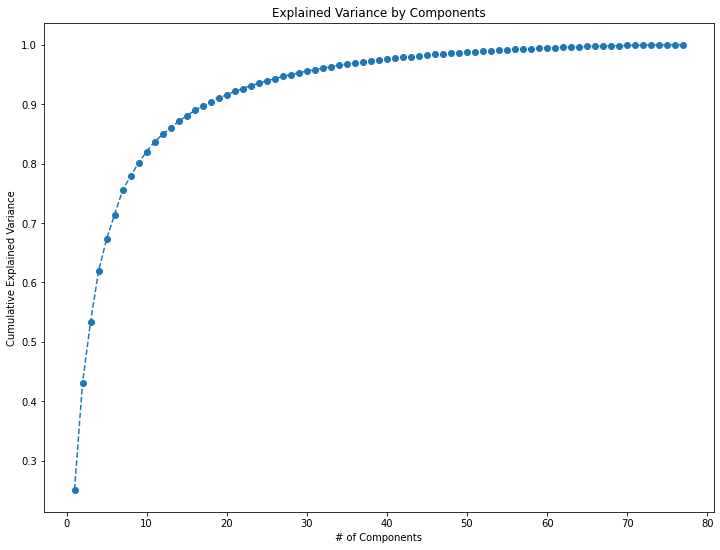

In [ ]:
# Plot PCA vs # of components
plt.figure(figsize=(12,9))
plt.plot(range(1,78), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca_norm = PCA(n_components = 7)
pca_norm.fit(df_norm)

PCA(n_components=7)

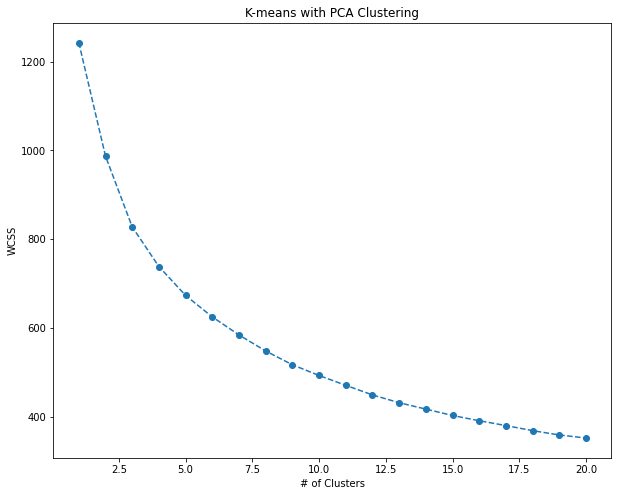

In [ ]:
# Use components determined from PCA analysis to calculate within cluster sum of squares and find optimal k value for k-means clustering
scores_pca_norm = pca_norm.transform(df_norm)
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca_norm)
  wcss.append(kmeans_pca.inertia_)
  
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

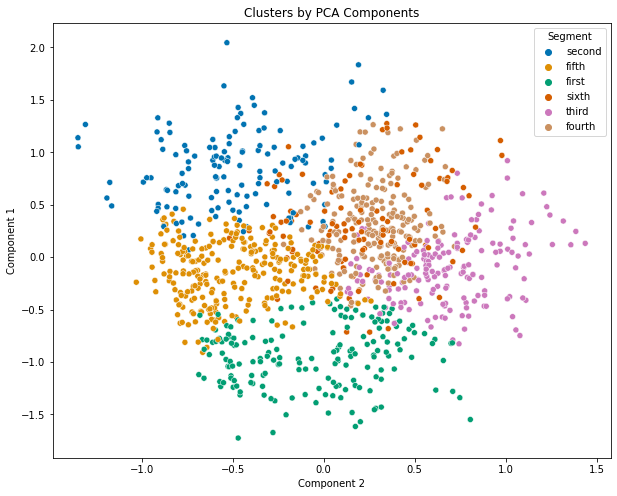

In [ ]:
# Run k-means clustering algorithm and plot result
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_norm)
df_norm_pca_kmeans = pd.concat([df_norm.reset_index(drop=True), pd.DataFrame(scores_pca_norm)], axis = 1)
df_norm_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']
df_norm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_norm_pca_kmeans['Segment'] = df_norm_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth'})

x_axis = df_norm_pca_kmeans['Component 2']
y_axis = df_norm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_norm_pca_kmeans['Segment'], palette = 'colorblind')
plt.title('Clusters by PCA Components')
plt.show

Calculate the statistical difference between groups for each protein to find which proteins are affected by the variables

In [ ]:
# Welch's test to compare genotype groups
df_compare_geno = df_norm_merged.drop(labels=['level_0', 'level_1', 'MouseID', 'Treatment', 'Behavior', 'Group'], axis=1)
df_control = df_compare_geno.groupby('Genotype').get_group('Control').reset_index()
df_ds = df_compare_geno.groupby('Genotype').get_group('Ts65Dn').reset_index()
df_ds = df_ds.drop(['index', 'Genotype'], axis=1)
df_control = df_control.drop(['index', 'Genotype'], axis=1)
df_geno = stats.ttest_ind(df_control, df_ds, equal_var=False)
df_geno

Ttest_indResult(statistic=array([ -2.99620588,  -5.90293873,   1.43234213,   3.68644933,
         5.36451666,  -3.02183651,  -0.44173974,  -0.89266129,
        -5.78911722,   1.16331963,   0.15119791,   0.63877516,
        -0.12756778,  -2.20747666,   6.20387847,   7.74725516,
         4.10864847,  -0.68215493,  -4.75846089,   2.71209299,
        -1.20182022,   2.00124054,  -1.88651336,   2.36216418,
         2.787009  ,  -1.0008962 ,  -1.07436055,  -2.08698209,
        -3.01156189,  -0.2862136 , -20.10330118,  -0.14284968,
        -1.60104719,   7.48528116,   5.68647884,   5.69368437,
        -1.09829867,   6.33976998,   6.02126121,   1.58334127,
         2.9894558 ,  -4.65082498,  -5.82811616,  -3.56391028,
        -0.56767094,  -4.40186455,  -9.23497292,  -2.79136913,
       -11.91561655,   3.19966878,  -8.19162721,  -2.2064027 ,
        -1.40223492,   4.49833489,  -0.80488277,  -0.55714675,
        -9.2389084 ,  -1.75468047,   8.88749293,   0.32976211,
         3.79803402,  -3.2872

In [ ]:
# Select for only the proteins responsible for differences
geno_p = np.array([2.80674860e-03, 4.97249759e-09, 1.52336544e-01, 2.38798267e-04,
       9.93368109e-08, 2.57502706e-03, 6.58766151e-01, 3.72262752e-01,
       9.28136108e-09, 2.45026500e-01, 8.79850702e-01, 5.23106382e-01,
       8.98516531e-01, 2.74952790e-02, 7.88653785e-10, 2.16490378e-14,
       4.28462336e-05, 4.95289262e-01, 2.22247686e-06, 6.79244512e-03,
       2.29751395e-01, 4.56270976e-02, 5.94949770e-02, 1.83459146e-02,
       5.41345752e-03, 3.17113030e-01, 2.82902115e-01, 3.71258094e-02,
       2.66037146e-03, 7.74769538e-01, 4.15443250e-76, 8.86436287e-01,
       1.09685731e-01, 1.58592278e-13, 1.70791521e-08, 1.72401931e-08,
       2.72352979e-01, 3.41231106e-10, 2.51813255e-09, 1.13648185e-01,
       2.86380021e-03, 3.75281973e-06, 7.81066086e-09, 3.81440171e-04,
       5.70377740e-01, 1.18203573e-05, 1.55055112e-19, 5.34403617e-03,
       9.33713450e-31, 1.41602273e-03, 7.68970728e-16, 2.75663979e-02,
       1.61133298e-01, 7.63162095e-06, 4.21064870e-01, 5.77543375e-01,
       1.35926253e-19, 7.96026310e-02, 2.58193541e-18, 7.41651269e-01,
       1.54052438e-04, 1.04443556e-03, 6.04227434e-01, 6.03233799e-01,
       1.37231011e-04, 1.86511164e-01, 9.45607009e-05, 7.49323033e-01,
       6.41515202e-01, 4.17492804e-02, 7.63162095e-06, 8.44291902e-03,
       4.02156085e-14, 1.73018731e-18, 5.91922211e-10, 9.14136109e-07,
       1.31650837e-01])
geno_result = np.where(geno_p < 0.01)
geno_result

(array([ 0,  1,  3,  4,  5,  8, 14, 15, 16, 18, 19, 24, 28, 30, 33, 34, 35,
        37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 53, 56, 58, 60, 61,
        64, 66, 70, 71, 72, 73, 74, 75]),)

In [ ]:
# Repeat Welch's test on treatment groups
df_compare_drug = df_norm_merged.drop(labels=['level_0', 'level_1', 'MouseID', 'Genotype', 'Behavior', 'Group'], axis=1)
df_s = df_compare_drug.groupby('Treatment').get_group('Saline').reset_index()
df_m = df_compare_drug.groupby('Treatment').get_group('Memantine').reset_index()
df_m = df_m.drop(['index', 'Treatment'], axis=1)
df_s = df_s.drop(['index', 'Treatment'], axis=1)
df_drug = stats.ttest_ind(df_s, df_m, equal_var=False)
df_drug

Ttest_indResult(statistic=array([ 3.29534001e-01,  9.89130779e-01,  2.21929748e+00,  2.18992254e+00,
       -2.34011321e-01, -4.28142247e+00, -6.24782680e+00, -6.24966025e+00,
        2.70378224e+00,  9.19598369e-02, -3.33530139e-01, -6.04113976e+00,
        1.15294786e+00, -3.48507117e+00,  4.42243270e-01, -4.09277396e+00,
       -1.19209625e+00,  6.56009470e+00, -8.01066377e-01,  2.14652555e+00,
       -1.18989776e-01, -8.07291082e-01, -3.89418662e+00,  5.14962443e+00,
        4.39124185e+00,  4.02148870e-01, -2.66228538e+00,  2.35198292e+00,
        1.35933061e+00, -1.37880401e+00,  6.67903439e-01,  3.00139134e+00,
        2.80903596e+00, -2.49451900e+00, -6.94111125e+00, -7.35260158e+00,
       -5.01909177e+00, -9.03665487e-01, -4.31022985e+00, -2.03986275e+00,
       -3.87554475e+00,  3.93499888e-03,  2.07458232e+00,  8.28574649e+00,
       -2.54622883e+00,  7.54254098e+00,  6.50646378e+00,  5.75839966e+00,
        7.18654529e+00,  2.19040772e+00,  3.72320077e+00,  2.25658993e+00,

In [ ]:
drug_p = np.array([7.41840957e-01, 3.22893106e-01, 2.66846085e-02, 2.87521980e-02,
       8.15021630e-01, 2.03416207e-05, 6.02689958e-10, 5.91412305e-10,
       6.96705263e-03, 9.26756254e-01, 7.38822152e-01, 2.15063708e-09,
       2.49213189e-01, 5.13151021e-04, 6.58406886e-01, 4.58291004e-05,
       2.33504467e-01, 8.45901895e-11, 4.23283399e-01, 3.20599903e-02,
       9.05315657e-01, 4.19676910e-01, 1.04587711e-04, 3.14611971e-07,
       1.23966728e-05, 6.87661555e-01, 7.88637229e-03, 1.88659447e-02,
       1.74331766e-01, 1.68241558e-01, 5.04344841e-01, 2.75237696e-03,
       5.06317709e-03, 1.27685161e-02, 6.70590218e-12, 4.07638648e-13,
       6.12757613e-07, 3.66381931e-01, 1.78918861e-05, 4.16249876e-02,
       1.12863996e-04, 9.96861105e-01, 3.82786755e-02, 3.87805410e-16,
       1.10335557e-02, 9.96858430e-14, 1.23867902e-10, 1.14193461e-08,
       1.28478473e-12, 2.87212076e-02, 2.07760194e-04, 2.42334908e-02,
       3.48182189e-07, 4.70715066e-06, 1.79394826e-02, 2.30658233e-06,
       4.95044358e-07, 1.87772608e-11, 6.19232045e-06, 3.64628616e-01,
       7.48848094e-13, 2.39132287e-12, 2.71651894e-04, 1.64385526e-06,
       1.95695996e-02, 1.60567876e-11, 2.72683373e-01, 2.35471828e-02,
       5.44660684e-01, 4.09790862e-08, 4.70715066e-06, 2.28953786e-01,
       7.23400251e-01, 1.31617184e-02, 2.42903779e-05, 2.21164338e-01,
       3.18128583e-05])
drug_result = np.where(drug_p < 0.01)
drug_result

(array([ 5,  6,  7,  8, 11, 13, 15, 17, 22, 23, 24, 26, 31, 32, 34, 35, 36,
        38, 40, 43, 45, 46, 47, 48, 50, 52, 53, 55, 56, 57, 58, 60, 61, 62,
        63, 65, 69, 70, 74, 76]),)

In [ ]:
# Repeat Welch's test on behavior groups
df_compare_behavior = df_norm_merged.drop(labels=['level_0', 'level_1', 'MouseID', 'Genotype', 'Treatment', 'Group'], axis=1)
df_learn = df_compare_behavior.groupby('Behavior').get_group('C/S').reset_index()
df_fail = df_compare_behavior.groupby('Behavior').get_group('S/C').reset_index()
df_fail = df_fail.drop(['index', 'Behavior'], axis=1)
df_learn = df_learn.drop(['index', 'Behavior'], axis=1)
df_behavior = stats.ttest_ind(df_fail, df_learn, equal_var=False)
df_behavior

Ttest_indResult(statistic=array([-18.79376903, -17.7666025 ,  -4.79307742,  -0.62869   ,
        -3.72915411,  12.39219644,  11.01402296,  18.47380807,
         8.09935124,  -9.75580777, -23.18321877,  11.17486287,
        -8.89794097,  12.88925278,   2.26807025,  14.43829437,
         2.46398273, -20.80620033,   1.37926959,  10.04501695,
       -17.33920087,   6.12290265,   6.85248437,  -3.12175948,
       -10.65334493, -17.39280436,  -0.56018386,   3.73575438,
        -3.8279073 ,   5.21735206,  -4.59815124,   2.79763082,
        41.13196046,  11.24987755,  24.63848377,  15.61976997,
         5.54462159,   1.85804799,  10.9227267 , -11.81723543,
         8.0362204 ,   3.72672801,  11.95456437,  -8.32640684,
         0.65660021, -17.54563524,   1.58609746, -10.3101835 ,
       -14.02933366,  -5.38537514,   7.29286736,   1.35801963,
         0.56108523,  22.31183476,  10.3324995 ,  12.04393734,
         7.364949  ,  -8.35833717,   0.223504  ,   2.89413761,
        16.05278776,   0.0830

In [ ]:
behavior_p = np.array([7.66172836e-062, 1.06600466e-057, 1.88014607e-006, 5.29686794e-001,
       2.02358227e-004, 4.57219750e-033, 8.26540698e-027, 2.23667404e-066,
       1.48538421e-015, 1.90761769e-021, 1.46331919e-083, 1.99078965e-027,
       2.50693830e-018, 1.91511793e-035, 2.35269687e-002, 2.61071571e-043,
       1.38961407e-002, 6.02025529e-078, 1.68162575e-001, 1.17031756e-022,
       2.86803050e-054, 1.28515972e-009, 1.22635887e-011, 1.85593350e-003,
       3.68055109e-025, 2.62262794e-058, 5.75475782e-001, 1.97136260e-004,
       1.36735376e-004, 2.18198641e-007, 4.78175152e-006, 5.23960755e-003,
       1.22958515e-174, 8.13507082e-028, 2.70588384e-105, 1.12175704e-049,
       3.76758026e-008, 6.34479018e-002, 2.26107863e-026, 2.63557602e-030,
       2.41974627e-015, 2.04257176e-004, 8.82290111e-031, 2.80850943e-016,
       5.11587277e-001, 2.78280399e-060, 1.13061437e-001, 1.05100839e-023,
       3.41418895e-041, 9.31197832e-008, 7.83750988e-013, 1.74771842e-001,
       5.74867980e-001, 3.25792911e-090, 7.30707194e-024, 4.39835613e-031,
       4.13529306e-013, 1.95439996e-016, 8.23186178e-001, 3.88764098e-003,
       3.74342703e-052, 9.33844865e-001, 1.82182047e-011, 4.96578597e-029,
       1.14942470e-068, 1.89124112e-116, 1.07910659e-004, 6.79355746e-013,
       2.58912351e-015, 8.56552997e-014, 3.25792911e-090, 1.78981247e-014,
       1.79288334e-002, 5.55283361e-043, 2.09224068e-056, 2.69710469e-064,
       3.26399796e-188])
behavior_result = np.where(behavior_p < 0.01)
behavior_result

(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 19, 20,
        21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39,
        40, 41, 42, 43, 45, 47, 48, 49, 50, 53, 54, 55, 56, 57, 59, 60, 62,
        63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76]),)

In [ ]:
# Fine the index of genes that are affected by the variable
geno_result = pd.DataFrame(geno_result, index=['Index']).T
drug_result = pd.DataFrame(drug_result, index=['Index']).T
behavior_result = pd.DataFrame(behavior_result, index=['Index']).T
genes_geno_drug = pd.merge(geno_result, drug_result, on='Index', how='inner')
genes_geno_behavior = pd.merge(geno_result, behavior_result, on='Index', how='inner')
genes_drug_behavior = pd.merge(drug_result, behavior_result, on='Index', how='inner')
genes_all = pd.merge(genes_geno_drug, behavior_result, on='Index', how='inner')

Now we have the indices for the proteins that are affected by the various groupings of variables (Genotype, Treatment, Behavior, Genotype+Treatment, Genotype+Behavior, Treatment+Behavior, and Genotype+Treatment+Behavior)

In [ ]:
# Create a list of the protein labels to compare the results of the Welch's test to
proteins = list(df_norm.columns.values)

In [ ]:
# Determine which proteins are affected by genotype
geno_proteins = geno_result['Index'].values.tolist()
for x in geno_proteins:
  print(proteins[x])

DYRK1A_N
ITSN1_N
NR1_N
NR2A_N
pAKT_N
pCREB_N
pNR1_N
pNR2A_N
pNR2B_N
pRSK_N
AKT_N
ERK_N
TRKA_N
APP_N
MTOR_N
P38_N
pMTOR_N
AMPKA_N
NR2B_N
RAPTOR_N
TIAM1_N
pP70S6_N
NUMB_N
pGSK3B_N
pPKCG_N
CDK5_N
S6_N
ADARB1_N
AcetylH3K9_N
ARC_N
Tau_N
GluR3_N
IL1B_N
P3525_N
SNCA_N
pGSK3B_Tyr216_N
pS6_N
pCFOS_N
SYP_N
H3AcK18_N
EGR1_N
H3MeK4_N


In [ ]:
# Determine which proteins are affected by genotype vs treatment
geno_drug_index = genes_geno_drug['Index'].values.tolist()
for x in geno_drug_index:
  print(proteins[x])

pAKT_N
pCREB_N
pNR2A_N
ERK_N
P38_N
pMTOR_N
NR2B_N
RAPTOR_N
NUMB_N
pGSK3B_N
pPKCG_N
CDK5_N
S6_N
AcetylH3K9_N
ARC_N
Tau_N
GluR3_N
IL1B_N
P3525_N
pS6_N
EGR1_N


In [ ]:
# Determine proteins affected by genotype vs behavior
geno_behavior_index = genes_geno_behavior['Index'].values.tolist()
for x in geno_behavior_index:
  print(proteins[x])

DYRK1A_N
ITSN1_N
NR2A_N
pAKT_N
pCREB_N
pNR2A_N
AKT_N
ERK_N
TRKA_N
APP_N
MTOR_N
P38_N
pMTOR_N
NR2B_N
RAPTOR_N
TIAM1_N
pP70S6_N
NUMB_N
pGSK3B_N
CDK5_N
S6_N
ADARB1_N
AcetylH3K9_N
ARC_N
Tau_N
IL1B_N
SNCA_N
pGSK3B_Tyr216_N
pS6_N
pCFOS_N
H3AcK18_N
EGR1_N
H3MeK4_N


In [ ]:
# Determine proteins affected by treatment vs behavior
drug_behavior_index = genes_drug_behavior['Index'].values.tolist()
for x in drug_behavior_index:
  print(proteins[x])

pAKT_N
pBRAF_N
pCAMKII_N
pCREB_N
pJNK_N
pMEK_N
pNR2A_N
pPKCAB_N
CREB_N
ELK_N
ERK_N
Bcatenin_N
SOD1_N
P38_N
pMTOR_N
DSCR1_N
NR2B_N
RAPTOR_N
NUMB_N
pGSK3B_N
CDK5_N
S6_N
AcetylH3K9_N
ARC_N
nNOS_N
Tau_N
GFAP_N
IL1B_N
pCASP9_N
PSD95_N
Ubiquitin_N
BCL2_N
pS6_N
EGR1_N
CaNA_N


In [ ]:
# Determine proteins affected by all three categories
all_index = genes_all['Index'].values.tolist()
for x in all_index:
  print(proteins[x])

pAKT_N
pCREB_N
pNR2A_N
ERK_N
P38_N
pMTOR_N
NR2B_N
RAPTOR_N
NUMB_N
pGSK3B_N
CDK5_N
S6_N
AcetylH3K9_N
ARC_N
Tau_N
IL1B_N
pS6_N
EGR1_N


Cluster for genotype + treatment

In [ ]:
# Create new data frames with only the proteins of interest for each condition
df_geno_drug = df_norm[['pAKT_N', 'pCREB_N', 'pNR2A_N', 'ERK_N', 'P38_N', 'pMTOR_N', 'NR2B_N', 'RAPTOR_N', 'NUMB_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'AcetylH3K9_N', 'ARC_N', 'Tau_N', 'GluR3_N', 'IL1B_N', 'P3525_N', 'pS6_N', 'EGR1_N']]
df_geno_drug

pAKT_N   pCREB_N   pNR2A_N     ERK_N     P38_N   pMTOR_N    NR2B_N  \
0     0.327006  0.617322  0.286697  0.627907  0.152338  0.687269  0.509996   
1     0.311887  0.590173  0.270688  0.578736  0.137451  0.621033  0.457694   
2     0.306369  0.607102  0.283848  0.599925  0.137475  0.616142  0.467725   
3     0.335530  0.486945  0.211238  0.452058  0.144945  0.605654  0.461189   
4     0.314976  0.410194  0.200364  0.433909  0.121261  0.548237  0.416698   
5     0.326476  0.425856  0.212134  0.448823  0.096964  0.529936  0.418594   
6     0.340336  0.428965  0.180387  0.360946  0.150316  0.616676  0.457095   
7     0.318608  0.398022  0.174302  0.348797  0.134550  0.551599  0.412892   
8     0.302609  0.350880  0.157033  0.320366  0.094472  0.490775  0.374988   
9     0.345540  0.389179  0.143984  0.255282  0.236000  0.600540  0.439760   
10    0.349378  0.374652  0.148601  0.255768  0.176130  0.549417  0.430922   
11    0.321758  0.400196  0.143682  0.240239  0.151169  0.521437  0.407141   
12    0.352369  0.300959  0.120315  0.195222  0.206677  0.546604  0.426601   
13    0.341654  0.346488  0.121695  0.202818  0.202451  0.545203  0.394892   
14    0.333272  0.328846  0.114252  0.185264  0.185312  0.511774  0.370276   
15    0.327466  0.422121  0.450457  0.732999  0.206821  0.736498  0.592547   
16    0.285687  0.319885  0.394391  0.629698  0.189304  0.679888  0.525327   
17    0.298618  0.302888  0.407674  0.627825  0.171329  0.693415  0.504979   
18    0.346460  0.404071  0.397030  0.585931  0.250410  0.741045  0.565766   
19    0.278575  0.253835  0.293716  0.445850  0.173012  0.624281  0.457025   
20    0.301989  0.319199  0.341732  0.490770  0.202709  0.693888  0.492373   
21    0.410379  0.358273  0.363519  0.517241  0.294327  0.775636  0.597131   
22    0.332603  0.330265  0.330073  0.488665  0.280897  0.748570  0.548989   
23    0.321956  0.285690  0.295381  0.411269  0.220543  0.699584  0.486505   
24    0.366811  0.337989  0.294630  0.359735  0.354977  0.756748  0.544654   
25    0.472415  0.461196  0.369198  0.427448  0.470267  0.906303  0.698196   
26    0.396005  0.337258  0.271161  0.312237  0.327573  0.717718  0.518051   
27    0.319844  0.256793  0.239008  0.242842  0.324613  0.688314  0.554722   
28    0.393843  0.254993  0.242745  0.239299  0.399670  0.747325  0.570232   
29    0.335857  0.295089  0.221948  0.224375  0.369447  0.735998  0.546167   
30    0.283012  0.617493  0.642841  0.863626  0.220747  0.660335  0.666339   
31    0.293338  0.755851  0.671459  0.924851  0.236231  0.685196  0.751023   
32    0.298214  0.754685  0.685220  0.903018  0.247327  0.731113  0.705726   
33    0.325704  0.498060  0.513414  0.715057  0.233879  0.620651  0.627769   
34    0.337215  0.546571  0.544407  0.727420  0.257045  0.653170  0.685509   
35    0.356822  0.559449  0.576272  0.782320  0.268760  0.723216  0.679271   
36    0.348756  0.403344  0.416770  0.569756  0.256455  0.622404  0.577173   
37    0.366090  0.452809  0.461091  0.612665  0.277955  0.648167  0.640274   
38    0.385420  0.426985  0.495839  0.640767  0.306897  0.713068  0.664497   
39    0.427168  0.496855  0.422257  0.567588  0.330921  0.676934  0.624146   
40    0.407492  0.494263  0.432150  0.577549  0.325427  0.690413  0.630265   
41    0.411680  0.493531  0.469169  0.566017  0.350545  0.719596  0.686225   
42    0.452863  0.557239  0.379007  0.496612  0.292732  0.678960  0.629392   
43    0.451776  0.681130  0.406319  0.511721  0.323020  0.721667  0.661233   
44    0.470758  0.446770  0.417446  0.493357  0.347395  0.753842  0.683582   
45    0.271292  0.442228  0.515362  0.785107  0.232346  0.655371  0.654392   
46    0.271754  0.477003  0.535647  0.774107  0.231597  0.661207  0.649106   
47    0.289559  0.505505  0.556038  0.782747  0.249781  0.692170  0.680912   
48    0.343617  0.399233  0.455659  0.659913  0.258688  0.659001  0.651289   
49    0.333420  0.442964  0.476136  0.687952  0.278427  0.667779  0.653613   
50    0.322861  0.435647  0.48

In [ ]:
# Run PCA
pca.fit(df_geno_drug)
pca.explained_variance_ratio_

array([2.56823340e-01, 1.97327356e-01, 1.23762376e-01, 1.13928618e-01,
       7.07998383e-02, 4.67676668e-02, 4.26266207e-02, 3.19955933e-02,
       2.20627312e-02, 2.03043927e-02, 1.52749771e-02, 1.42098459e-02,
       9.69145792e-03, 8.79523435e-03, 5.95773919e-03, 5.45665703e-03,
       4.30165945e-03, 4.01369471e-03, 3.13102723e-03, 2.76917358e-03,
       4.62138889e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

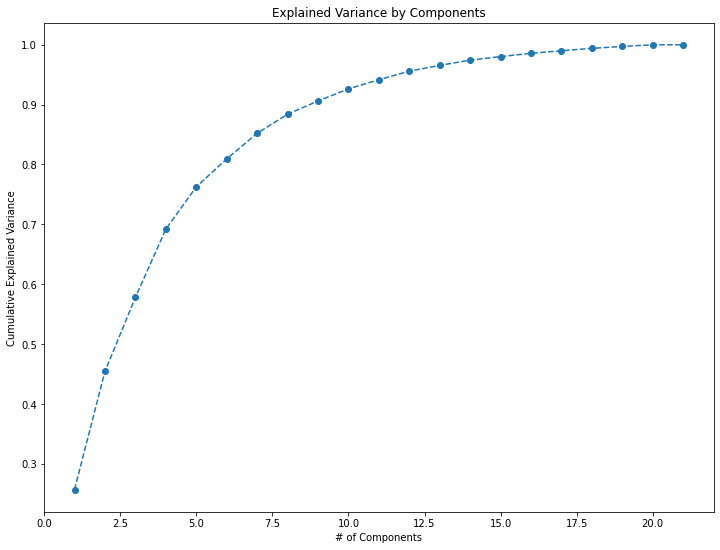

In [ ]:
# Plot PCA to determine components
plt.figure(figsize=(12,9))
plt.plot(range(1,22), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca_geno_drug = PCA(n_components = 5)
pca_geno_drug.fit(df_geno_drug)

PCA(n_components=5)

In [ ]:
scores_pca_geno_drug = pca_geno_drug.transform(df_geno_drug)

In [ ]:
# Determine optimal k value through WCSS
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca_geno_drug)
  wcss.append(kmeans_pca.inertia_)

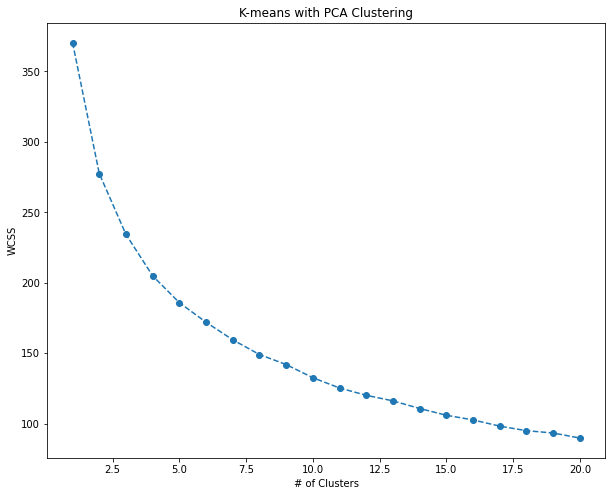

In [ ]:
# Plot WCSS vs # of clusters
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
# Run K-means
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_geno_drug)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df_geno_drug_pca_kmeans = pd.concat([df_geno_drug.reset_index(drop=True), pd.DataFrame(scores_pca_geno_drug)], axis = 1)
df_geno_drug_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
df_geno_drug_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_geno_drug_pca_kmeans['Segment'] = df_geno_drug_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

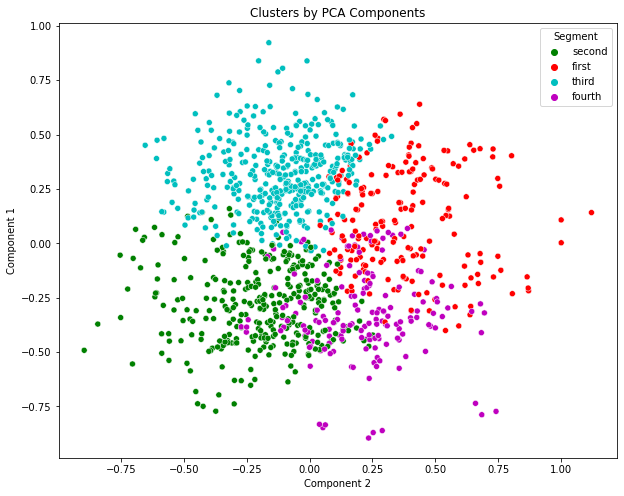

In [ ]:
# Plot K-means
x_axis = df_geno_drug_pca_kmeans['Component 2']
y_axis = df_geno_drug_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_geno_drug_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show

Cluster for genotype + behavior

In [ ]:
df_geno_beh = df_norm[['DYRK1A_N','ITSN1_N','NR2A_N','pAKT_N','pCREB_N','pNR2A_N','AKT_N','ERK_N','TRKA_N','APP_N','MTOR_N','P38_N','pMTOR_N','NR2B_N','RAPTOR_N','TIAM1_N','pP70S6_N','NUMB_N','pGSK3B_N','CDK5_N','S6_N','ADARB1_N','AcetylH3K9_N','ARC_N','Tau_N','IL1B_N','SNCA_N','pGSK3B_Tyr216_N','pS6_N','pCFOS_N','H3AcK18_N','EGR1_N', 'H3MeK4_N']]
pca.fit(df_geno_beh)
pca.explained_variance_ratio_

array([2.43522624e-01, 2.29084974e-01, 1.12704556e-01, 9.38860982e-02,
       4.72166180e-02, 4.08341347e-02, 3.47415769e-02, 2.61813415e-02,
       2.43662737e-02, 1.81033212e-02, 1.68731769e-02, 1.46590492e-02,
       1.25109658e-02, 1.15302723e-02, 9.86672472e-03, 9.03078821e-03,
       7.89496252e-03, 6.95490940e-03, 5.45505601e-03, 4.72690937e-03,
       4.51989914e-03, 4.36841474e-03, 3.84871986e-03, 3.43844612e-03,
       2.92408083e-03, 2.20158811e-03, 2.09779366e-03, 1.92034184e-03,
       1.61887155e-03, 1.43804608e-03, 1.17666411e-03, 3.02801101e-04,
       1.10481129e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

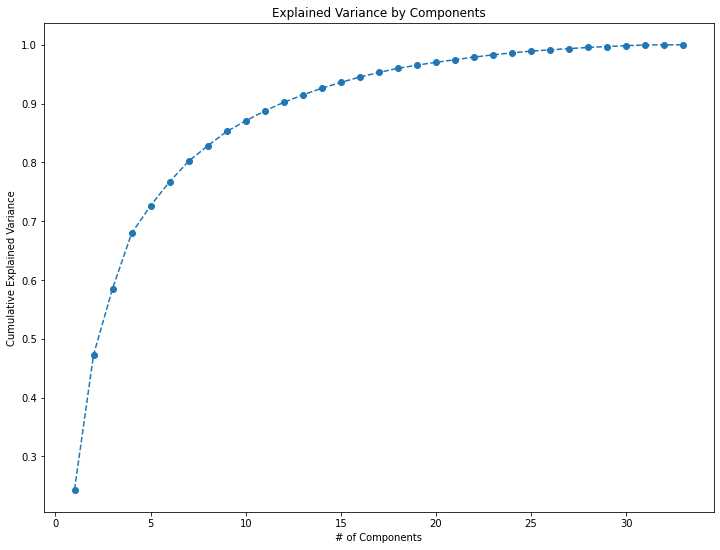

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,34), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Explained Variance')

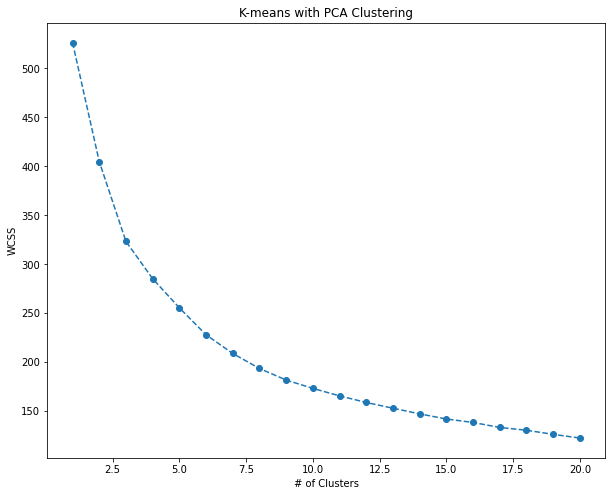

In [ ]:
pca_geno_beh = PCA(n_components = 5)
pca_geno_beh.fit(df_geno_beh)
scores_pca_geno_beh = pca_geno_beh.transform(df_geno_beh)
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca_geno_beh)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

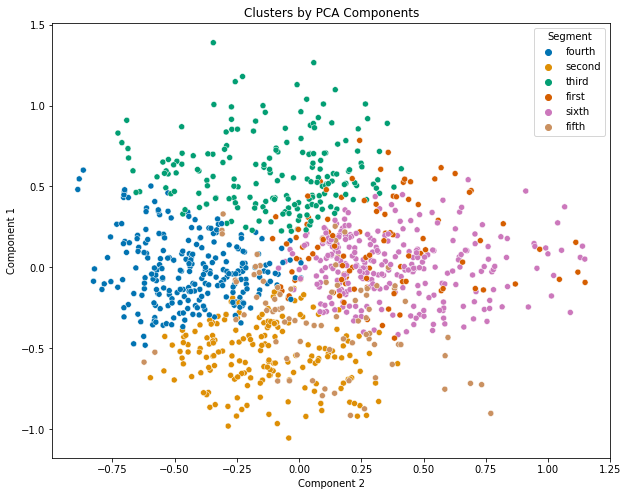

In [ ]:
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_geno_beh)
df_geno_beh_pca_kmeans = pd.concat([df_geno_beh.reset_index(drop=True), pd.DataFrame(scores_pca_geno_beh)], axis = 1)
df_geno_beh_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
df_geno_beh_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_geno_beh_pca_kmeans['Segment'] = df_geno_beh_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth'})

x_axis = df_geno_beh_pca_kmeans['Component 2']
y_axis = df_geno_beh_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_geno_beh_pca_kmeans['Segment'], palette = 'colorblind')
plt.title('Clusters by PCA Components')
plt.show

Cluster for Behavior + Treatment

In [ ]:
df_beh_drug = df_norm[['pAKT_N','pBRAF_N','pCAMKII_N','pCREB_N','pJNK_N','pMEK_N','pNR2A_N','pPKCAB_N','CREB_N','ELK_N','ERK_N','Bcatenin_N','SOD1_N','P38_N','pMTOR_N','DSCR1_N','NR2B_N','RAPTOR_N','NUMB_N','pGSK3B_N','CDK5_N','S6_N','AcetylH3K9_N','ARC_N','nNOS_N','Tau_N','GFAP_N','IL1B_N','pCASP9_N','PSD95_N','Ubiquitin_N','BCL2_N','pS6_N','EGR1_N','CaNA_N']]
pca.fit(df_beh_drug)
pca.explained_variance_ratio_

array([2.81295204e-01, 2.00769075e-01, 1.15329507e-01, 7.08861856e-02,
       5.76964733e-02, 5.11693302e-02, 3.78555770e-02, 2.27773370e-02,
       2.02484003e-02, 1.67953610e-02, 1.52345453e-02, 1.24018141e-02,
       1.16020055e-02, 1.07079332e-02, 9.32987543e-03, 8.62806208e-03,
       7.99376043e-03, 6.45015658e-03, 5.07956893e-03, 4.95137035e-03,
       4.60824114e-03, 4.26894458e-03, 3.74465984e-03, 3.42806452e-03,
       2.67014975e-03, 2.29176829e-03, 1.98289538e-03, 1.88241849e-03,
       1.73865699e-03, 1.49791066e-03, 1.29925032e-03, 1.21150519e-03,
       1.10490113e-03, 1.06909149e-03, 5.54756973e-32])

Text(0, 0.5, 'Cumulative Explained Variance')

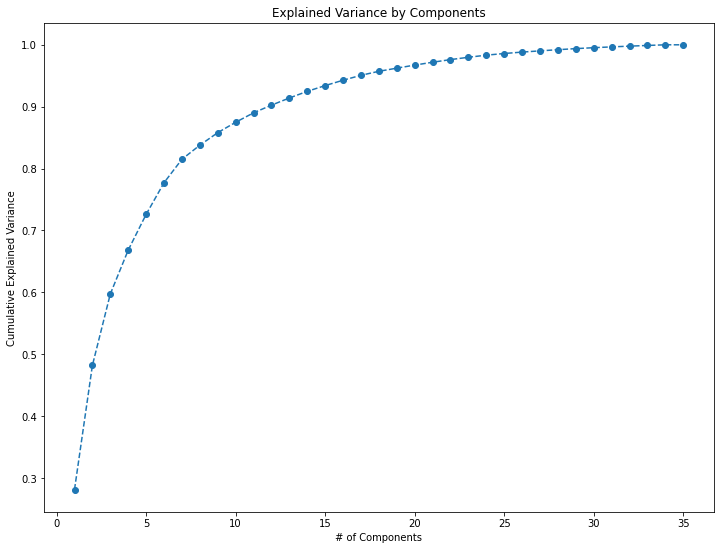

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,36), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Explained Variance')

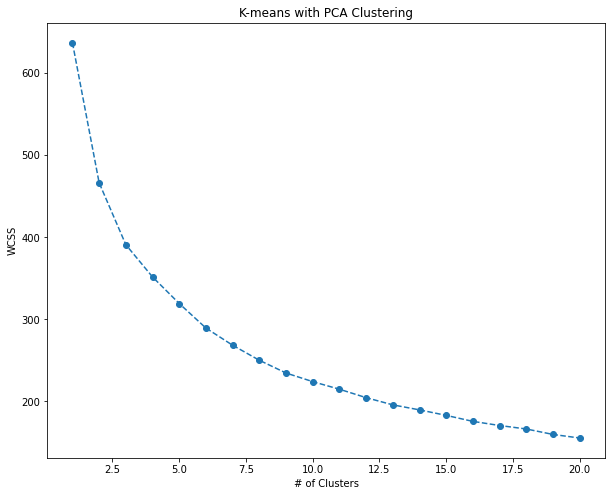

In [ ]:
pca_beh_drug = PCA(n_components = 6)
pca_beh_drug.fit(df_beh_drug)
scores_pca_beh_drug = pca_beh_drug.transform(df_beh_drug)
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca_beh_drug)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

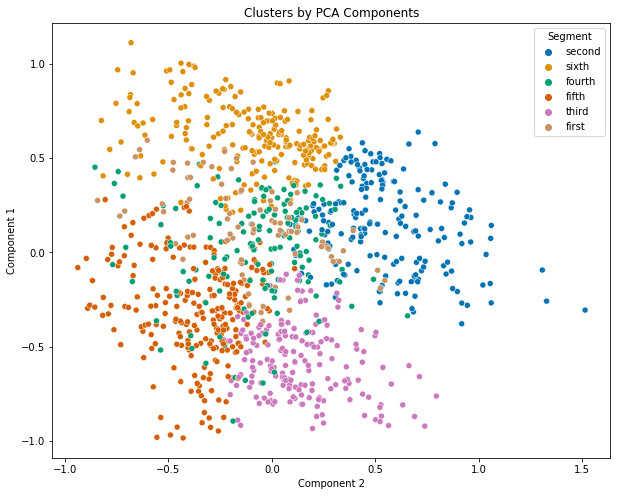

In [ ]:
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_beh_drug)
df_beh_drug_pca_kmeans = pd.concat([df_beh_drug.reset_index(drop=True), pd.DataFrame(scores_pca_beh_drug)], axis = 1)
df_beh_drug_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
df_beh_drug_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_beh_drug_pca_kmeans['Segment'] = df_beh_drug_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth'})

x_axis = df_beh_drug_pca_kmeans['Component 2']
y_axis = df_beh_drug_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_beh_drug_pca_kmeans['Segment'], palette = 'colorblind')
plt.title('Clusters by PCA Components')
plt.show

Cluster for Genotype, Behavior, and Treatment

In [ ]:
df_all_groups = df_norm[['pAKT_N','pCREB_N','pNR2A_N','ERK_N','P38_N','pMTOR_N','NR2B_N','RAPTOR_N','NUMB_N','pGSK3B_N','CDK5_N','S6_N','AcetylH3K9_N','ARC_N','Tau_N','IL1B_N','pS6_N','EGR1_N']]
pca.fit(df_all_groups)
pca.explained_variance_ratio_

array([3.05088576e-01, 2.28315075e-01, 1.37368839e-01, 9.52350973e-02,
       5.26647262e-02, 4.27717937e-02, 3.20209682e-02, 2.48591995e-02,
       1.94391091e-02, 1.43026880e-02, 1.15698805e-02, 9.55483769e-03,
       7.75126371e-03, 5.78899791e-03, 5.21252956e-03, 4.58973130e-03,
       3.46668703e-03, 3.27905176e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

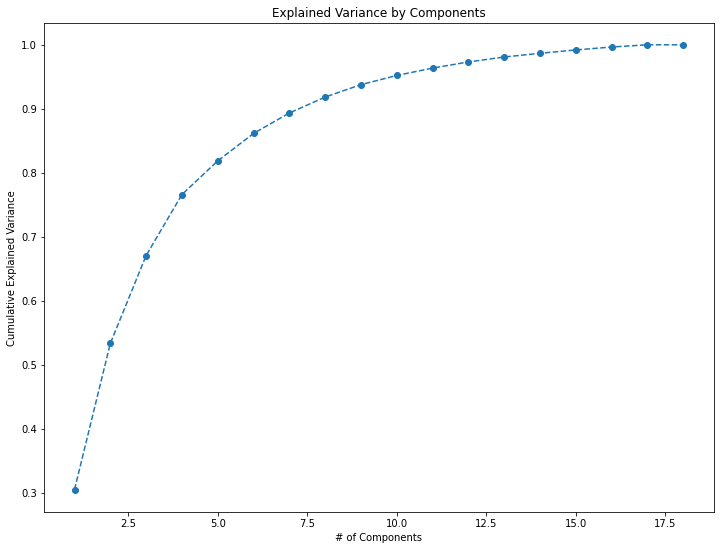

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Explained Variance')

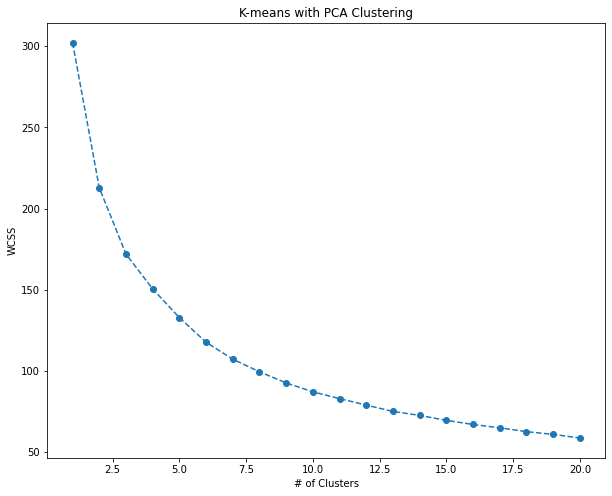

In [ ]:
pca_all_groups = PCA(n_components = 4)
pca_all_groups.fit(df_all_groups)
scores_pca_all_groups = pca_all_groups.transform(df_all_groups)
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca_all_groups)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

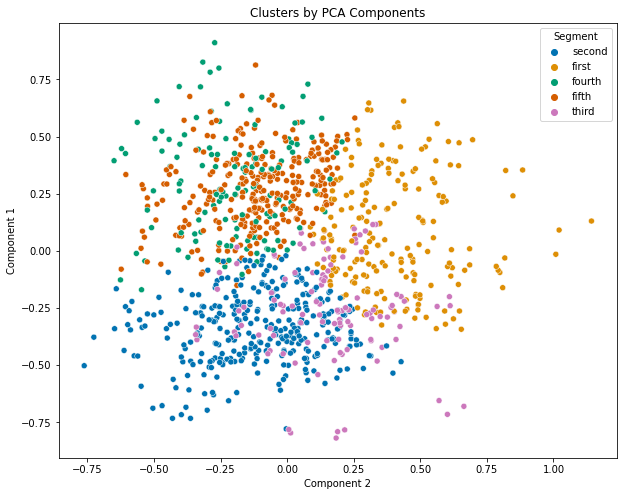

In [ ]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca_all_groups)
df_all_groups_pca_kmeans = pd.concat([df_all_groups.reset_index(drop=True), pd.DataFrame(scores_pca_all_groups)], axis = 1)
df_all_groups_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_all_groups_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_all_groups_pca_kmeans['Segment'] = df_all_groups_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'})

x_axis = df_all_groups_pca_kmeans['Component 2']
y_axis = df_all_groups_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_all_groups_pca_kmeans['Segment'], palette = 'colorblind')
plt.title('Clusters by PCA Components')
plt.show

Analyze Clusters and characterize them
(As note: Need to change group data from categorical to numerical
c-CS-s: 1
c-CS-m: 2
c-SC-s: 3
c-SC-m: 4
t-CS-s: 5
t-CS-m: 6
t-SC-s: 7
t-SC-m: 8)

In [ ]:
# Create parallel coordinates plot for genotype vs treatment
geno_drug_cluster = pd.DataFrame(df_geno_drug_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Segment'], axis=1), index=df_geno_drug.index, columns=df_geno_drug.columns)
geno_drug_cluster['Clusters'] = df_geno_drug_pca_kmeans['Segment K-means PCA']
df_filled_new['Group'].replace(['c-CS-s','c-CS-m','c-SC-s','c-SC-m','t-CS-s','t-CS-m','t-SC-s','t-SC-m'], [1,2,3,4,5,6,7,8], inplace=True)
geno_drug_cluster['Group'] = df_filled_new['Group']
fig = px.parallel_coordinates(geno_drug_cluster, color='Clusters',
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [ ]:
# Create parallel coordinates plot for genotype vs behavior
geno_beh_cluster = pd.DataFrame(df_geno_beh_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Segment'], axis=1), index=df_geno_beh.index, columns=df_geno_beh.columns)
geno_beh_cluster['Clusters'] = df_geno_beh_pca_kmeans['Segment K-means PCA']
geno_beh_cluster['Group'] = df_filled_new['Group']
fig = px.parallel_coordinates(geno_beh_cluster, color="Clusters",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [ ]:
# Create parallel coordinates plot for behavior vs treatment
beh_drug_cluster = pd.DataFrame(df_beh_drug_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Segment'], axis=1), index=df_beh_drug.index, columns=df_beh_drug.columns)
beh_drug_cluster['Clusters'] = df_beh_drug_pca_kmeans['Segment K-means PCA']
beh_drug_cluster['Group'] = df_filled_new['Group']
fig = px.parallel_coordinates(beh_drug_cluster, color="Clusters",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [ ]:
# Create parallel coordinates plot for all groups together
all_groups_cluster = pd.DataFrame(df_all_groups_pca_kmeans.drop(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Segment'], axis=1), index=df_all_groups.index, columns=df_all_groups.columns)
all_groups_cluster['Clusters'] = df_all_groups_pca_kmeans['Segment K-means PCA']
all_groups_cluster['Group'] = df_filled_new['Group']
fig = px.parallel_coordinates(all_groups_cluster, color="Clusters",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()